In [160]:
import os
import mat73
import importlib

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import spectral_scan as sp
import temperature_prediction as tp
import visualizations as vis

importlib.reload(sp)
importlib.reload(tp)
importlib.reload(vis)

<module 'visualizations' from 'e:\\OneDrive - Johns Hopkins\\pcct_thermometry\\visualizations.py'>

In [3]:
open_projs = sp.load_proj_mat("projection_mat\empty\open_beam.mat")
empty_projs1 = sp.load_proj_mat("projection_mat\empty\empty1.mat") # day 1: water
empty_projs2 = sp.load_proj_mat("projection_mat\empty\empty2.mat") # day 2: 50 mM
empty_projs3 = sp.load_proj_mat("projection_mat\empty\empty3.mat") # day 3: 600 mM, 300 mM, protein shake

# (num_projections, proj_width, proj_height)
print(open_projs.shape)
print(empty_projs1.shape)
print(empty_projs2.shape)
print(empty_projs3.shape)

(3998, 256, 1280)
(1998, 256, 1280)
(1998, 256, 1280)
(1998, 256, 1280)


[999, 999, 1000, 1000]
Average intensity in ROI of 8-33 kvp bin: 1130.18307196085
[999, 999, 1000, 1000]
Average intensity in ROI of 33-45 kvp bin: 354.4341313943343
[999, 999, 1000, 1000]
Average intensity in ROI of 45-60 kvp bin: 232.66248261327712
[999, 999, 1000, 1000]
Average intensity in ROI of 60-110 kvp bin: 292.98508158995816

[499, 499, 500, 500]
Average intensity in ROI of 8-33 kvp bin: 996.286128264676
[499, 499, 500, 500]
Average intensity in ROI of 33-45 kvp bin: 320.3602105992948
[499, 499, 500, 500]
Average intensity in ROI of 45-60 kvp bin: 206.63975826446284
[499, 499, 500, 500]
Average intensity in ROI of 60-110 kvp bin: 258.9356649537513

[99, 99, 100, 100]
Average intensity in ROI of 8-33 kvp bin: 764.1247990105132
[99, 99, 100, 100]
Average intensity in ROI of 33-45 kvp bin: 245.26041130731778
[99, 99, 100, 100]
Average intensity in ROI of 45-60 kvp bin: 168.6144859813084
[99, 99, 100, 100]
Average intensity in ROI of 60-110 kvp bin: 208.74412008281575



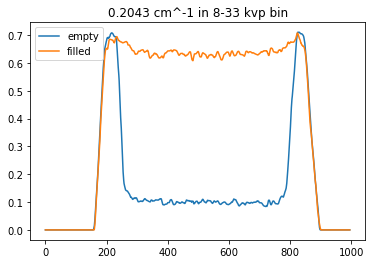

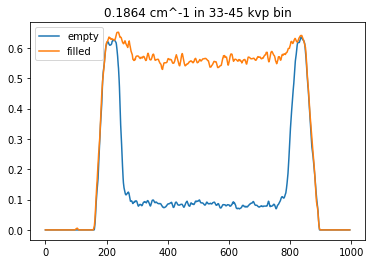

e:\OneDrive - Johns Hopkins\pcct_thermometry\spectral_scan.py:111: RuntimeWarning: invalid value encountered in true_divide
  for i in range(4):
e:\OneDrive - Johns Hopkins\pcct_thermometry\spectral_scan.py:112: RuntimeWarning: invalid value encountered in true_divide
  empty_profile = np.log(np.divide(self.open_projs[i], self.empty_projs[i]))


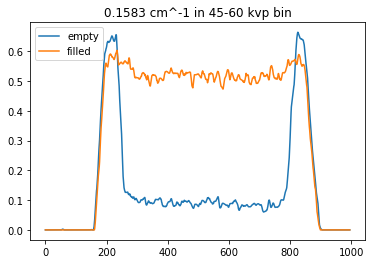

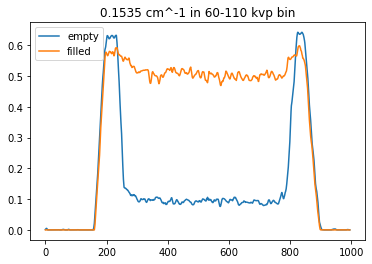

In [27]:
ROI_line1 = [200, 200, 201, 1200] # [row0, col0, row1, col1]
ROI_line2 = [202, 200, 203, 1200]
ROI_rect = [100, 600, 200, 700]
 
scan = sp.SpectralScan(open_projs, empty_projs3, ROI=ROI_line1, verbose=True)
filled_projs = sp.load_proj_mat("projection_mat\protein\T40.mat")
scan.set_filled_projs(filled_projs, verbose=True)
attenuations = scan.cmp_spectral_mus(verbose=True, method="weak_perspective")

In [44]:
scanner = sp.SpectralScan(open_projs, empty_projs3, ROI=[195, 200, 196, 1200])

fpath_water = "projection_mat\water"
fpath_c50 = "projection_mat\cacl2_50mM"
fpath_c300 = "projection_mat\cacl2_300mM"
fpath_c600 = "projection_mat\cacl2_600mM"
fpath_protein = "projection_mat\protein_shake"

temps_water, mu_mtx_water, mu_std_mtx_water = sp.get_mu_mtx(fpath_water, scanner)
temps_c50, mu_mtx_c50, mu_std_mtx_c50 = sp.get_mu_mtx(fpath_c50, scanner)
temps_c300, mu_mtx_c300, mu_std_mtx_c300 = sp.get_mu_mtx(fpath_c300, scanner)
temps_c600, mu_mtx_c600, mu_std_mtx_c600 = sp.get_mu_mtx(fpath_c600, scanner)
temps_protein, mu_mtx_protein, mu_std_mtx_protein = sp.get_mu_mtx(fpath_protein, scanner)

# save mean and standard deviation of attenuations as csv
save_path = "placeholder_path"
names = ["water", "c50", "c300", "c600", "protein"]
all_temps = [temps_water, temps_c50, temps_c300, temps_c600, temps_protein]
all_mu_mtx = [mu_mtx_water, mu_mtx_c50, mu_mtx_c300, mu_mtx_c600, mu_mtx_protein]
all_mu_std_mtx = [mu_std_mtx_water, mu_std_mtx_c50, mu_std_mtx_c300, mu_std_mtx_c600, mu_std_mtx_protein]

for name, temp, mu_mtx, mu_std_mtx in zip(names, all_temps, all_mu_mtx, all_mu_std_mtx):
    temperatures = pd.DataFrame(temp)
    mu_mtx = pd.DataFrame(mu_mtx)
    mu_std_mtx = pd.DataFrame(mu_std_mtx)
    
    temperatures.to_csv(f"{save_path}\\temps_{name}.csv", header=None, index=None)
    mu_mtx.to_csv(f"{save_path}\mu_mtx_{name}.csv", header=None, index=None)
    mu_std_mtx.to_csv(f"{save_path}\mu_std_mtx_{name}.csv", header=None, index=None)

C:\Users\Nathan\AppData\Local\Temp\ipykernel_1444\728613711.py:107: RuntimeWarning: invalid value encountered in true_divide
  empty_profile = np.log(np.divide(self.open_projs[i], self.empty_projs[i]))
C:\Users\Nathan\AppData\Local\Temp\ipykernel_1444\728613711.py:108: RuntimeWarning: invalid value encountered in true_divide
  filled_profile = np.log(np.divide(self.open_projs[i], self.filled_projs[i]))
C:\Users\Nathan\AppData\Local\Temp\ipykernel_1444\728613711.py:108: RuntimeWarning: invalid value encountered in log
  filled_profile = np.log(np.divide(self.open_projs[i], self.filled_projs[i]))
C:\Users\Nathan\AppData\Local\Temp\ipykernel_1444\728613711.py:107: RuntimeWarning: invalid value encountered in log
  empty_profile = np.log(np.divide(self.open_projs[i], self.empty_projs[i]))


In [111]:
# loads all attenuation data into a dictionary, which can be accessed by their file names

def read_from_csv(fname):
    data = pd.read_csv(f"attenuation_csv\{fname}", header=None).to_numpy()

    if(fname[0] == "t"):
        return data.flatten()
    return data

prefixes = ["mu_", "std_", "temps_"]
mixtures = ["c300", "c50", "c600", "protein", "water"]
keys = [prefix + mix for prefix in prefixes for mix in mixtures]
values = os.listdir("attenuation_csv")
data_dict = {}

for key, value in zip(keys, values):
    data_dict[key] = read_from_csv(value)

In [41]:
X_set = []
y_set = []
num = 333 # number of training examples = 3 * num

for i in range(num):
    x1, y1 = tp.generate_example(data_dict["mu_water"], data_dict["std_water"], data_dict["temps_water"])
    x2, y2 = tp.generate_example(data_dict["mu_c600"], data_dict["std_c600"], data_dict["temps_c600"])
    x3, y3 = tp.generate_example(data_dict["mu_c50"], data_dict["std_c50"], data_dict["temps_c50"])
    X_set = X_set + [x1, x2, x3]
    y_set = y_set + [y1, y2, y3]

X_set = np.reshape(np.array(X_set), (3*num, 1, 8))
y_set = np.reshape(np.array(y_set), (3*num, 1, 1))

# (training_examples, 1, elements)
print(X_set.shape)
print(y_set.shape)

(999, 1, 8)
(999, 1, 1)


In [19]:
temp_mlp = tp.TemperatureMLP(activation="relu")
temp_mlp.model().summary()
opt = tf.keras.optimizers.SGD(learning_rate=1e-5)
temp_mlp.compile(
    optimizer = opt,
    loss = "mse",
    metrics = ["mae"]
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 8)]            0         
_________________________________________________________________
dense (Dense)                (None, 1, 4)              36        
_________________________________________________________________
dense_1 (Dense)              (None, 1, 4)              20        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              5         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
799/799 [==============================] - 2s 2ms/step - loss: 2098.5913 - mae: 44.6810 - val_loss: 1962.5161 - val_mae: 43.1275

Epoch 00001: val_mae improved from inf to 43.12754, saving model to D:\\ct_thermometry\MLP-01-43.13.tf
INFO:tensorflow:Assets written to: D:\\ct_thermometry\MLP-01-43.13.tf\assets
Epoch 2/100
799/799 [==============================] - 1s 1ms/step - loss: 1792.8268 - mae: 41.0968 - val_loss: 1220.6163 - val_mae: 33.6683

Epoch 00002: val_mae improved from 43.12754 to 33.66830, saving model to D:\\ct_thermometry\MLP-02-33.67.tf
INFO:tensorflow:Assets written to: D:\\ct_thermometry\MLP-02-33.67.tf\assets
Epoch 3/100
799/799 [==============================] - 1s 2ms/step - loss: 328.2757 - mae: 14.1071 - val_loss: 42.0363 - val_mae: 5.9062

Epoch 00003: val_mae improved from 33.66830 to 5.90615, saving model to D:\\ct_thermometry\MLP-03-5.91.tf
INFO:tensorflow:Assets written to: D:\\ct_thermometry\MLP-03-5.91.tf\assets
Epoch 4/100
799/799 [==========

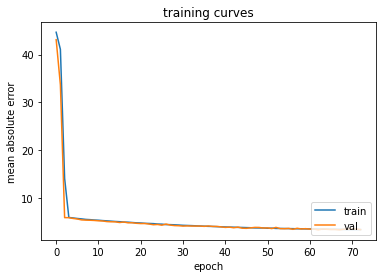

In [18]:
# train the MLP regression model

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = r"D:\\ct_thermometry\\MLP-{epoch:02d}-{val_mae:.2f}.tf",
    monitor = "val_mae",
    verbose = 1,
    save_best_only = True,
    mode = "min"
)
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mae", patience=10, verbose=1) # stops training after "patience" epochs with no increase in val_accuracy
log_csv = tf.keras.callbacks.CSVLogger("D:\ct_thermometry\\shared_data\\training_logs.csv", separator=",", append=False) # save data for training curves

history = temp_mlp.fit(
    X_set,
    y_set, 
    batch_size = 1,
    shuffle = True,
    epochs = 100, 
    validation_split = 0.2,
    callbacks = [early_stop, log_csv, checkpoint]
)

plt.plot(history.history["mae"], label="train")
plt.plot(history.history["val_mae"], label="validation")
plt.title("training curves")
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [42]:
# load trained model
# must instantiate subclassed model before loading weights to use model(input) to predict
# cryptic error messages when run twice (ignore)

loaded_model = tp.TemperatureMLP(activation="relu")
loaded_model.load_weights("temp_MLP")

protein
prediction: 35.92 C, label: 38 C
prediction: 38.17 C, label: 40 C
prediction: 40.40 C, label: 43 C
prediction: 42.67 C, label: 45 C
prediction: 50.16 C, label: 50 C

c300
prediction: 36.35 C, label: 35 C
prediction: 41.95 C, label: 40 C
prediction: 48.04 C, label: 45 C
prediction: 54.23 C, label: 50 C
prediction: 60.75 C, label: 55 C
prediction: 67.48 C, label: 60 C











































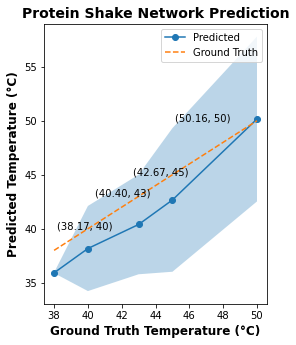

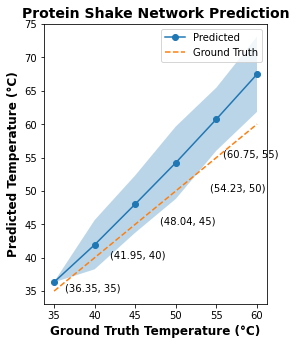

In [165]:
importlib.reload(vis)

print("protein")
protein_pred = tp.predict_on_material(
    data_dict["mu_protein"], 
    data_dict["std_protein"], 
    data_dict["temps_protein"], 
    loaded_model, 
    verbose=True, 
    noise=False)

print("c300")
c300_pred = tp.predict_on_material(
    data_dict["mu_c300"], 
    data_dict["std_c300"], 
    data_dict["temps_c300"], 
    loaded_model, 
    verbose=True, 
    noise=False)

protein_std = tp.get_pred_std(data_dict["mu_protein"], data_dict["std_protein"], data_dict["temps_protein"], loaded_model, 20)
c300_std = tp.get_pred_std(data_dict["mu_c300"], data_dict["std_c300"], data_dict["temps_c300"], loaded_model, 20)

vis.prediction_plot(protein_pred, data_dict["temps_protein"], 1.96*protein_std)
vis.prediction_plot(c300_pred, data_dict["temps_c300"], 1.96*c300_std)